# An example showing how to generate bootstrapped error bars.

In [1]:
from __future__ import print_function

In [2]:
import os
import sys
import time
import json

import pygsti
from pygsti.construction import std1Q_XYI

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Get a GST estimate (similar to Tutorial 0)

# 1) get the target GateSet
gs_target = std1Q_XYI.gs_target

# 2) get the building blocks needed to specify which gate sequences are needed
prep_fiducials, meas_fiducials = std1Q_XYI.prepStrs, std1Q_XYI.effectStrs
germs = std1Q_XYI.germs
maxLengths = [1,2,4,8,16]

# 3) generate "fake" data from a depolarized version of gs_target
gs_datagen = gs_target.depolarize(gate_noise=0.1, spam_noise=0.001)
listOfExperiments = pygsti.construction.make_lsgst_experiment_list(
    gs_target, prep_fiducials, meas_fiducials, germs, maxLengths)
ds = pygsti.construction.generate_fake_data(gs_datagen, listOfExperiments, nSamples=1000,
                                            sampleError="binomial", seed=1234)


results = pygsti.do_stdpractice_gst(ds, gs_target, prep_fiducials, meas_fiducials,
                                    germs, maxLengths, modes="TP")
estimated_gateset = results.estimates['TP'].gatesets['single']

-- Std Practice:  Iter 1 of 1  (TP) --: 
  --- Gate Sequence Creation ---
  --- LGST ---
  --- Iterative MLGST: [##################################################] 100.0%  1282 gate strings ---
  Iterative MLGST Total Time: 2.3s
  --- Re-optimizing logl after robust data scaling ---
  -- Performing 'single' gauge optimization on TP estimate --
  -- Conveying 'single' gauge optimization to TP.Robust+ estimate --


## Parametric Bootstrapping
Here we do parametric bootstrapping, as indicated by the 'parametric' argument below.
The output is eventually stored in the "mean" and "std" GateSets, which hold the mean and standard deviation values of the set of bootstrapped gatesets (after gauge optimization).  It is this latter "standard deviation Gateset"
which holds the collection of error bars.  Note: due to print setting issues, the outputs that are printed here will not necessarily reflect the true accuracy of the estimates made.


In [4]:
#The number of simulated datasets & gatesets made for bootstrapping purposes.  
# For good statistics, should probably be greater than 10.
numGatesets=10

param_boot_gatesets = pygsti.drivers.make_bootstrap_gatesets(
                        numGatesets, ds, 'parametric', prep_fiducials, meas_fiducials, germs, maxLengths,
                        inputGateSet=estimated_gateset, startSeed=0, returnData=False,
                        verbosity=2)

Creating DataSets: 
0 Generating parametric dataset.
1 Generating parametric dataset.
2 Generating parametric dataset.
3 Generating parametric dataset.
4 Generating parametric dataset.
5 Generating parametric dataset.
6 Generating parametric dataset.
7 Generating parametric dataset.
8 Generating parametric dataset.
9 Generating parametric dataset.
Creating GateSets: 
Running MLGST Iteration 0 
--- Gate Sequence Creation ---
   1282 sequences created
   Dataset has 1282 entries: 1282 utilized, 0 requested sequences were missing
--- LGST ---
  Singular values of I_tilde (truncating to first 4 of 6) = 
  4.243740981718673
  1.196825270321894
  0.9803977850297132
  0.9189829897008691
  0.04573617221601241
  0.02684031856476036
  
  Singular values of target I_tilde (truncating to first 4 of 6) = 
  4.2440765871547805
  1.1775300369228388
  0.9531813852473716
  0.9453339713427231
  3.092369762442044e-16
  2.0221726661332703e-16
  
--- Iterative MLGST: Iter 1 of 5  92 gate strings ---: 
  --

  Completed in 0.2s
  2*Delta(log(L)) = 123.873
  Iteration 2 took 0.3s
  
--- Iterative MLGST: Iter 3 of 5  450 gate strings ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 375.888 (449 data params - 31 model params = expected mean of 418; p-value = 0.931259)
  Completed in 0.5s
  2*Delta(log(L)) = 376.466
  Iteration 3 took 0.5s
  
--- Iterative MLGST: Iter 4 of 5  862 gate strings ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 787.336 (861 data params - 31 model params = expected mean of 830; p-value = 0.85296)
  Completed in 0.8s
  2*Delta(log(L)) = 787.672
  Iteration 4 took 0.9s
  
--- Iterative MLGST: Iter 5 of 5  1282 gate strings ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 1173.37 (1281 data params - 31 model params = expected mean of 1250; p-value = 0.939642)
  Completed in 1.3s
  2*Delta(log(L)) = 1173.91
  Iteration 5 took 1.3s
  
  Switching to ML objective (last iteration)
  --- MLGST ---
    Maximum log(L) = 586.913 below upper bound of -2.1359e+06
      2*

--- LGST ---
  Singular values of I_tilde (truncating to first 4 of 6) = 
  4.244480338214524
  1.165763527245094
  0.9338843507514768
  0.894817674590485
  0.03560561553467106
  0.011817184934139907
  
  Singular values of target I_tilde (truncating to first 4 of 6) = 
  4.2440765871547805
  1.1775300369228388
  0.9531813852473716
  0.9453339713427231
  3.092369762442044e-16
  2.0221726661332703e-16
  
--- Iterative MLGST: Iter 1 of 5  92 gate strings ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 50.8873 (91 data params - 31 model params = expected mean of 60; p-value = 0.792879)
  Completed in 0.3s
  2*Delta(log(L)) = 51.09
  Iteration 1 took 0.3s
  
--- Iterative MLGST: Iter 2 of 5  168 gate strings ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 118.749 (167 data params - 31 model params = expected mean of 136; p-value = 0.853817)
  Completed in 0.3s
  2*Delta(log(L)) = 118.844
  Iteration 2 took 0.3s
  
--- Iterative MLGST: Iter 3 of 5  450 gate strings ---: 
  --- Minimum

In [5]:
gauge_opt_pboot_gatesets = pygsti.drivers.gauge_optimize_gs_list(param_boot_gatesets, estimated_gateset,
                                                                 plot=False) #plotting support removed w/matplotlib

Spam weight 0
Spam weight 1
Spam weight 2
Spam weight 3
Spam weight 4
Spam weight 5
Spam weight 6
Spam weight 7
Spam weight 8
Spam weight 9
Spam weight 10
Spam weight 11
Spam weight 12
Best SPAM weight is 1.0


In [6]:
pboot_mean = pygsti.drivers.to_mean_gateset(gauge_opt_pboot_gatesets, estimated_gateset)
pboot_std  = pygsti.drivers.to_std_gateset(gauge_opt_pboot_gatesets, estimated_gateset)

#Summary of the error bars
print("Parametric bootstrapped error bars, with", numGatesets, "resamples\n")
print("Error in rho vec:") 
print(pboot_std['rho0'], end='\n\n')
print("Error in effect vecs:")
print(pboot_std['Mdefault'], end='\n\n')
print("Error in Gi:")
print(pboot_std['Gi'], end='\n\n')
print("Error in Gx:")
print(pboot_std['Gx'], end='\n\n')
print("Error in Gy:")
print(pboot_std['Gy'])

Parametric bootstrapped error bars, with 10 resamples

Error in rho vec:
TPParameterizedSPAMVec with dimension 4
 0.71   0   0   0


Error in effect vecs:
TPPOVM with effect vectors:
0: FullyParameterizedSPAMVec with dimension 4
   0   0   0   0

1: ComplementSPAMVec with dimension 4
 1.41   0   0   0



Error in Gi:
TPParameterizedGate with shape (4, 4)
 1.00   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0


Error in Gx:
TPParameterizedGate with shape (4, 4)
 1.00   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0


Error in Gy:
TPParameterizedGate with shape (4, 4)
 1.00   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0



## Non-parametric Bootstrapping
Here we do non-parametric bootstrapping, as indicated by the 'nonparametric' argument below.
The output is again eventually stored in the "mean" and "std" GateSets, which hold the mean and standard deviation values of the set of bootstrapped gatesets (after gauge optimization).  It is this latter "standard deviation Gateset"
which holds the collection of error bars.  Note: due to print setting issues, the outputs that are printed here will not necessarily reflect the true accuracy of the estimates made.

(Technical note: ddof = 1 is by default used when computing the standard deviation -- see numpy.std -- meaning that we are computing a standard deviation of the sample, not of the population.)

In [7]:
#The number of simulated datasets & gatesets made for bootstrapping purposes.  
# For good statistics, should probably be greater than 10.
numGatesets=10

nonparam_boot_gatesets = pygsti.drivers.make_bootstrap_gatesets(
                          numGatesets, ds, 'nonparametric', prep_fiducials, meas_fiducials, germs, maxLengths,
                          targetGateSet=estimated_gateset, startSeed=0, returnData=False, verbosity=2)

Creating DataSets: 
0 Generating non-parametric dataset.
1 Generating non-parametric dataset.
2 Generating non-parametric dataset.
3 Generating non-parametric dataset.
4 Generating non-parametric dataset.
5 Generating non-parametric dataset.
6 Generating non-parametric dataset.
7 Generating non-parametric dataset.
8 Generating non-parametric dataset.
9 Generating non-parametric dataset.
Creating GateSets: 
Running MLGST Iteration 0 
--- Gate Sequence Creation ---
   1282 sequences created
   Dataset has 1282 entries: 1282 utilized, 0 requested sequences were missing
--- LGST ---
  Singular values of I_tilde (truncating to first 4 of 6) = 
  4.244212085138186
  1.1843719301091324
  0.9857947532159174
  0.9013030041875327
  0.09547108379285918
  0.04886490428154151
  
  Singular values of target I_tilde (truncating to first 4 of 6) = 
  4.2440765871547805
  1.1775300369228388
  0.9531813852473716
  0.9453339713427231
  3.092369762442044e-16
  2.0221726661332703e-16
  
--- Iterative MLGST

--- LGST ---
  Singular values of I_tilde (truncating to first 4 of 6) = 
  4.243988002748227
  1.2013993194238075
  0.9736701526820217
  0.9363076178129426
  0.027172808326342654
  0.005255940106641545
  
  Singular values of target I_tilde (truncating to first 4 of 6) = 
  4.2440765871547805
  1.1775300369228388
  0.9531813852473716
  0.9453339713427231
  3.092369762442044e-16
  2.0221726661332703e-16
  
--- Iterative MLGST: Iter 1 of 5  92 gate strings ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 159.939 (91 data params - 31 model params = expected mean of 60; p-value = 5.00061e-11)
  Completed in 0.2s
  2*Delta(log(L)) = 160.22
  Iteration 1 took 0.2s
  
--- Iterative MLGST: Iter 2 of 5  168 gate strings ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 289.265 (167 data params - 31 model params = expected mean of 136; p-value = 4.25104e-13)
  Completed in 0.2s
  2*Delta(log(L)) = 289.212
  Iteration 2 took 0.3s
  
--- Iterative MLGST: Iter 3 of 5  450 gate strings ---: 
  -

  Completed in 0.2s
  2*Delta(log(L)) = 168.443
  Iteration 1 took 0.2s
  
--- Iterative MLGST: Iter 2 of 5  168 gate strings ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 305.858 (167 data params - 31 model params = expected mean of 136; p-value = 4.21885e-15)
  Completed in 0.2s
  2*Delta(log(L)) = 306.043
  Iteration 2 took 0.3s
  
--- Iterative MLGST: Iter 3 of 5  450 gate strings ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 897.008 (449 data params - 31 model params = expected mean of 418; p-value = 0)
  Completed in 0.6s
  2*Delta(log(L)) = 897.009
  Iteration 3 took 0.6s
  
--- Iterative MLGST: Iter 4 of 5  862 gate strings ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 1832.6 (861 data params - 31 model params = expected mean of 830; p-value = 0)
  Completed in 0.9s
  2*Delta(log(L)) = 1834.65
  Iteration 4 took 0.9s
  
--- Iterative MLGST: Iter 5 of 5  1282 gate strings ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 2774.87 (1281 data params - 31 model param

  Iteration 3 took 0.7s
  
--- Iterative MLGST: Iter 4 of 5  862 gate strings ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 1691.71 (861 data params - 31 model params = expected mean of 830; p-value = 0)
  Completed in 0.9s
  2*Delta(log(L)) = 1696.13
  Iteration 4 took 1.0s
  
--- Iterative MLGST: Iter 5 of 5  1282 gate strings ---: 
  --- Minimum Chi^2 GST ---
  Sum of Chi^2 = 2508.01 (1281 data params - 31 model params = expected mean of 1250; p-value = 0)
  Completed in 1.4s
  2*Delta(log(L)) = 2513.11
  Iteration 5 took 1.5s
  
  Switching to ML objective (last iteration)
  --- MLGST ---
    Maximum log(L) = 1256.4 below upper bound of -2.13552e+06
      2*Delta(log(L)) = 2512.81 (1281 data params - 31 model params = expected mean of 1250; p-value = 0)
    Completed in 0.9s
  2*Delta(log(L)) = 2512.81
  Final MLGST took 0.9s
  
Iterative MLGST Total Time: 4.5s
  -- Adding Gauge Optimized (go0) --
--- Re-optimizing logl after robust data scaling ---
  --- MLGST ---
    Maximum

In [8]:
gauge_opt_npboot_gatesets = pygsti.drivers.gauge_optimize_gs_list(nonparam_boot_gatesets, estimated_gateset,
                                                                 plot=False) #plotting removed w/matplotlib

Spam weight 0
Spam weight 1
Spam weight 2
Spam weight 3
Spam weight 4
Spam weight 5
Spam weight 6
Spam weight 7
Spam weight 8
Spam weight 9
Spam weight 10
Spam weight 11
Spam weight 12
Best SPAM weight is 1.0


In [9]:
npboot_mean = pygsti.drivers.to_mean_gateset(gauge_opt_npboot_gatesets, estimated_gateset)
npboot_std  = pygsti.drivers.to_std_gateset(gauge_opt_npboot_gatesets, estimated_gateset)

#Summary of the error bars
print("Non-parametric bootstrapped error bars, with", numGatesets, "resamples\n")
print("Error in rho vec:")
print(npboot_std['rho0'], end='\n\n')
print("Error in effect vecs:")
print(npboot_std['Mdefault'], end='\n\n')
print("Error in Gi:")
print(npboot_std['Gi'], end='\n\n')
print("Error in Gx:")
print(npboot_std['Gx'], end='\n\n')
print("Error in Gy:")
print(npboot_std['Gy'])

Non-parametric bootstrapped error bars, with 10 resamples

Error in rho vec:
TPParameterizedSPAMVec with dimension 4
 0.71   0   0   0


Error in effect vecs:
TPPOVM with effect vectors:
0: FullyParameterizedSPAMVec with dimension 4
   0   0   0   0

1: ComplementSPAMVec with dimension 4
 1.41   0   0   0



Error in Gi:
TPParameterizedGate with shape (4, 4)
 1.00   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0


Error in Gx:
TPParameterizedGate with shape (4, 4)
 1.00   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0


Error in Gy:
TPParameterizedGate with shape (4, 4)
 1.00   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0



Text(0.5, 1.0, 'Scatter plot comparing param vs. non-param bootstrapping error bars.')

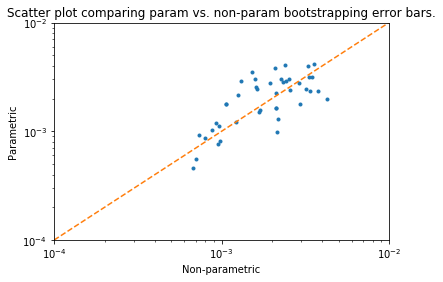

In [10]:
loglog(npboot_std.to_vector(),pboot_std.to_vector(),'.')
loglog(np.logspace(-4,-2,10),np.logspace(-4,-2,10),'--')
xlabel('Non-parametric')
ylabel('Parametric')
xlim((1e-4,1e-2)); ylim((1e-4,1e-2))
title('Scatter plot comparing param vs. non-param bootstrapping error bars.')